# Laboratorium 2


### Konfiguracja

In [1]:
from definitions import *
from graham import *
from jarvis import *
from timeit import timeit

In [2]:
#konfiguracja zadania 3a
a_points_count = 100
a_range_x = (-100, 100)
a_range_y = (-100, 100)
#konfiguracja zadania 3b
b_points_count = 100
b_center = (0, 0)
b_radius = 10
#konfiguracja zadania 3c
c_points_count = 100
c_verts = [
    (-10, 10),
    (-10, -10),
    (10, -10),
    (10, 10)
]
#konfiguracja zadania 3d
d_points_on_edges_count = 25
d_points_on_diagonals_count = 20
d_verts = [
    (0, 0),
    (10, 0),
    (10, 10),
    (0, 10)
]

# Zbiory danych

In [3]:
dataset1 = generate_dataset(a_points_count, random_point_in_ranges(a_range_x, a_range_y))
dataset2 = generate_dataset(b_points_count, random_point_on_circle(b_center, b_radius))
dataset3 = generate_dataset(c_points_count, random_point_on_rect(c_verts))
def generate_dataset4():
    a, b, c, d = d_verts
    return [
        *generate_dataset(d_points_on_diagonals_count, random_point_on_segment(a, c)),
        *generate_dataset(d_points_on_diagonals_count, random_point_on_segment(b, d)),
        *generate_dataset(d_points_on_edges_count, random_point_on_segment(a, b)),
        *generate_dataset(d_points_on_edges_count, random_point_on_segment(a, d)) 
    ] + d_verts
dataset4 = generate_dataset4()

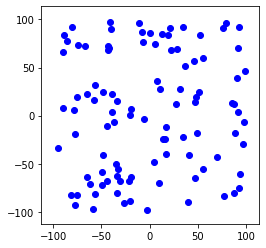

In [4]:
plot({ 'points': dataset1 })

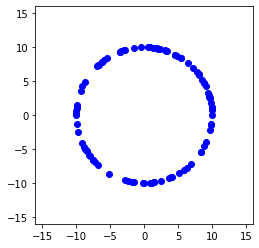

In [5]:
plot({ 'points': dataset2 })

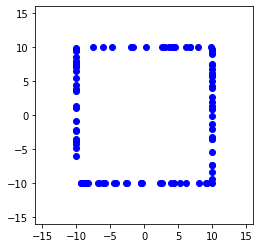

In [6]:
plot({ 'points': dataset3 })

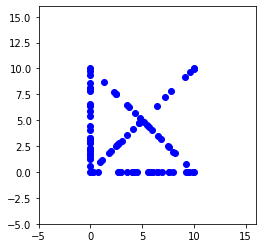

In [7]:
plot({ 'points': dataset4 })

# Algorytm Grahama

In [8]:
def graham(points, eps=10 ** -14):
    #1. Find point with smallest y, x
    p0 = min(points, key=flip)

    #2. Sort remaining points
    def partition(points):
        pivot, *tail = points
        low, hihg = [], []
        ret_pivot = pivot
        for p in tail:
            d = det(p0, pivot, p)
            if abs(d) < eps:
                # inline
                if dist_sq(p0, p) > dist_sq(p0, pivot):
                    ret_pivot = p
            elif d > 0:
                hihg.append(p)
            else:
                low.append(p)
        return low, hihg, ret_pivot

    def quick_sort(points):
        if len(points) <= 1:
            return points
        low, hihg, pivot = partition(points)
        return quick_sort(low) + [pivot] + quick_sort(hihg)

    #3. Initialize stack
    p1, p2, *tail = quick_sort(points)
    stack = [p0, p1, p2]

    #4. Execute the algorithm
    m = len(tail)
    i = 0
    while i < m:
        pi = tail[i]
        if det(stack[-2], stack[-1], pi) > eps:
            stack.append(pi)
            i += 1
        else:
            stack.pop()
    return stack

## Legenda wykresu
* zielony punk - p0 najmniejsze y, x
* czerwoen punky - punkty usunięte podczas sortowania
* szare punkty - punkty do przetworzenia 
* czarne punkty - puntky przetworzone nie będące częścią otoczki
* filetowe funkty - punkty na stosie

* w ostatnim kroku wszystkie punkty otoczki są zielone

<IPython.core.display.Javascript object>


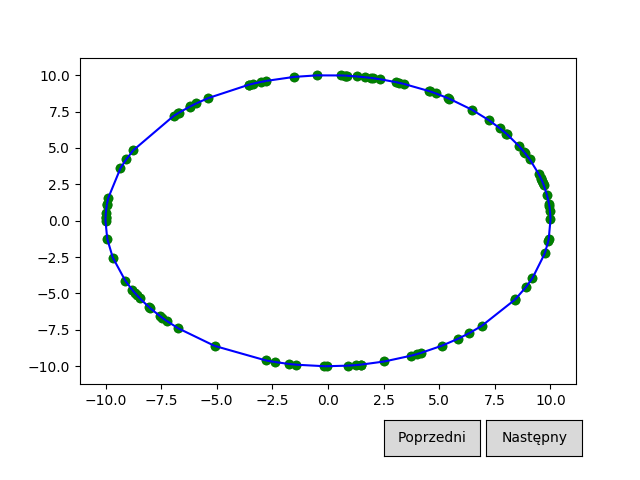

In [16]:
%matplotlib notebook
scenes = list(graham_visualization(dataset2, eps=10 ** -14))
plt = Plot(scenes)
plt.draw()

# Algorytm Jarvisa

In [10]:
def jarvis(points, eps= 10**-14):
    size = len(points)
    def swap(i, j):
        points[i], points[j] = points[j], points[i]

    p1, i = min_index(points, key=flip), 1
    swap(0, p1)

    while True:
        m = i
        for j in range(i + 1, size + 1):
            j %= size
            p = points[j]
            d = det(points[i - 1], points[m], p)
            if abs(d) < eps and dist_sq(points[i - 1], p) > dist_sq(points[i - 1], points[m]) or d < 0:
                m = j

        if m == 0:
            break
        swap(i, m)
        i += 1

    return points[:i]

In [17]:
%matplotlib notebook
print(len(dataset2))
scenes = list(jarvis_visualization(dataset2))
plt = Plot(scenes)
plt.draw()
print(len(dataset2))

100


IndexError: list index out of range

# Wydajność

In [12]:
# datasets = [dataset1, dataset2, dataset3, dataset4]
# for i, dataset in enumerate(datasets):
#     print ("dataset: ", i + 1)
#     print ("graham: ", timeit(lambda: graham(dataset), number=10))
#     print ("jarvis: ", timeit(lambda: graham(dataset), number=10))
#     print ()